<a href="https://colab.research.google.com/github/iomiranda/cs4650_hw5_newsapi/blob/main/cs4650_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
!pip install spacy
!pip install newsapi-python

In [186]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [187]:
import spacy
nlp_eng = spacy.load('en_core_web_lg')

In [188]:
newsapi = NewsApiClient (api_key='0322f891c020429591abd1c92da469c7')

In [189]:
articles = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-20', to='2020-03-17', sort_by='relevancy', page=1)

In [190]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))


In [191]:
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [192]:
dados = []
for i, article in enumerate(articles):
  for x in articles.get('articles'):
    title = x['title']
    description = x['description']
    content = x['content']
    date = x['publishedAt']
    dados.append({'title':title, 'date':date, 'desc':description, 'content':content})

In [193]:
import pandas as pd
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,A Timeline of the Coronavirus in 2020,2020-12-30T20:30:00Z,Even though the virus that causes COVID-19 was...,It was in January that the first known case of...
1,"Sorry, Mouthwash Isn't a Coronavirus Cure",2020-10-21T19:45:00Z,Mouthwash is designed to kill germs in your mo...,Mouthwash is designed to kill germs in your mo...
2,Check an Airline's Coronavirus Policies Before...,2020-10-21T16:00:00Z,Navigating air travel during the COVID-19 pand...,Navigating air travel during the COVID-19 pand...
3,How WeChat Censored the Coronavirus Pandemic,2020-08-27T21:30:00Z,"In China, the messaging platform blocked thous...",When the novelcoronavirus was first discovered...
4,"As Coronavirus Variants Spread, the US Struggl...",2021-02-19T12:00:00Z,The nation is a sequencing superpower. But wit...,"Its not a unique quirk, but like many other Co..."


In [194]:
import string

def get_keywords_eng(token):
  result = []
    
  for text in token:
    if (text in nlp_eng.Defaults.stop_words or text in string.punctuation):
      continue
    else:
      result.append(text)

  return result


In [195]:
results = []
for content in df.content.values:
    content = tokenizer.tokenize(content)
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])


df['keywords'] = results

#Check result
#for x in df['keywords']:
#  print(x)

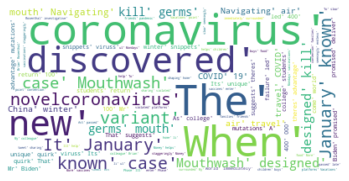

In [196]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()